In [183]:
## Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [184]:
#### Reading the data
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [185]:
#### checking the shape of dataset
lead_data.shape

(9240, 37)

In [186]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###### we have 35 columns and only few numeric columns lets further explore the columns

In [187]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [188]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


###### We can see that there are few column values as 'Select' for the ones which the customers have not selected any values, so we need to convert this values are null

In [189]:
lead_data = lead_data.replace("Select",np.NaN)

In [190]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [191]:
### lets check the null values now in each columns
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [192]:
##### we can see alot of null values so lets convert it to percent
round(100*(lead_data.isnull().sum()/lead_data.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

###### Lets go through all the null values columns and handle it one by one

In [193]:
#### Lets start from 'Country'
lead_data['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

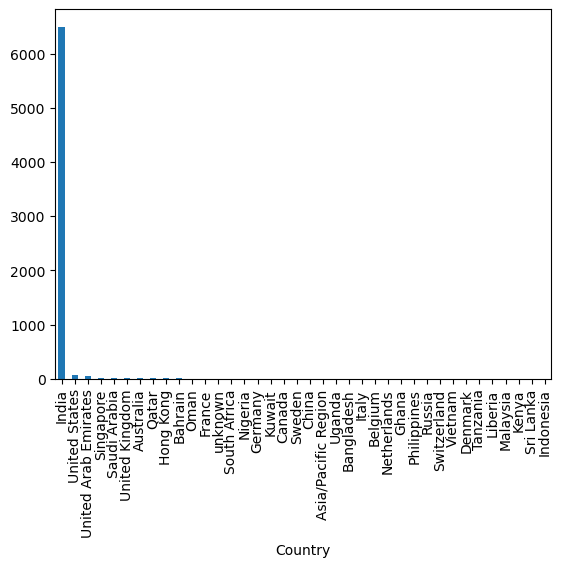

In [194]:
lead_data['Country'].value_counts().plot.bar()
plt.show()

In [195]:
#### As we can see that most of the values are India we can set the null values as India
lead_data['Country'] = lead_data['Country'].replace(np.nan, 'India')

In [196]:
#### Next look at another column which has missing values of 36% i.e Specialization
print(lead_data['Specialization'].value_counts())
print("Missing values",lead_data['Specialization'].isnull().sum())

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64
Missing values 3380


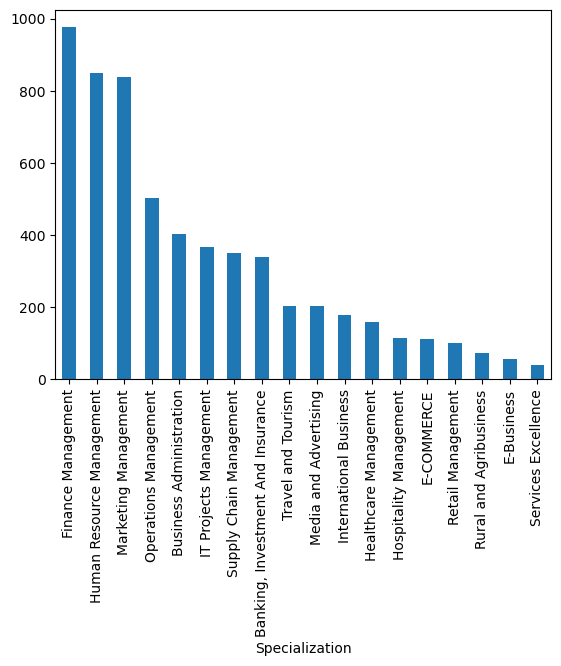

In [197]:
lead_data['Specialization'].value_counts().plot.bar()
plt.show()

In [198]:
#### we cannot just delete the rows which doesnot have any values, therefore we can simply assign their Specialization as 'Others'
lead_data['Specialization']= lead_data['Specialization'].replace(np.NaN,"Others")

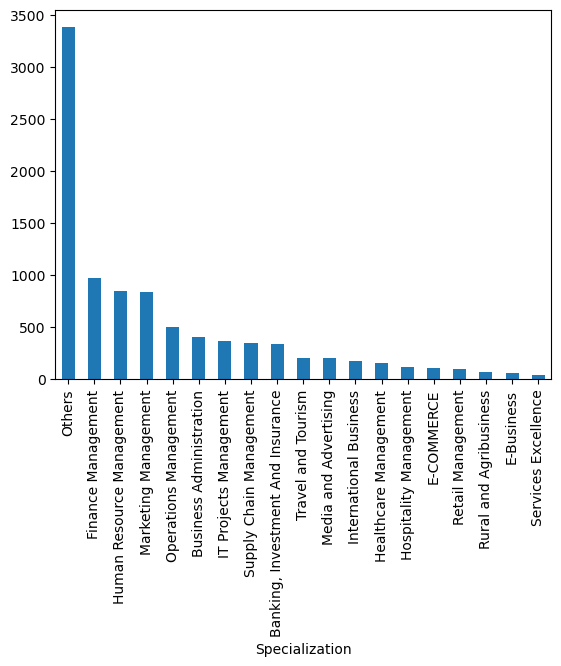

In [199]:
lead_data['Specialization'].value_counts().plot.bar()
plt.show()

In [200]:
##### Next we have column 'How did you hear about X Education' with 78% missing value
lead_data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: count, dtype: int64

In [201]:
### 78% missing value is way too high to replace with any value, therefore we need to drop this column
lead_data.drop("How did you hear about X Education",axis=1,inplace=True)

In [202]:
round(100*(lead_data.isnull().sum()/lead_data.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [203]:
### Next column we have is 'What is your current occupation' with 29% missing value
print(lead_data['What is your current occupation'].value_counts())
print("-------------------Missing value count--------------",lead_data['What is your current occupation'].isnull().sum())

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64
-------------------Missing value count-------------- 2690


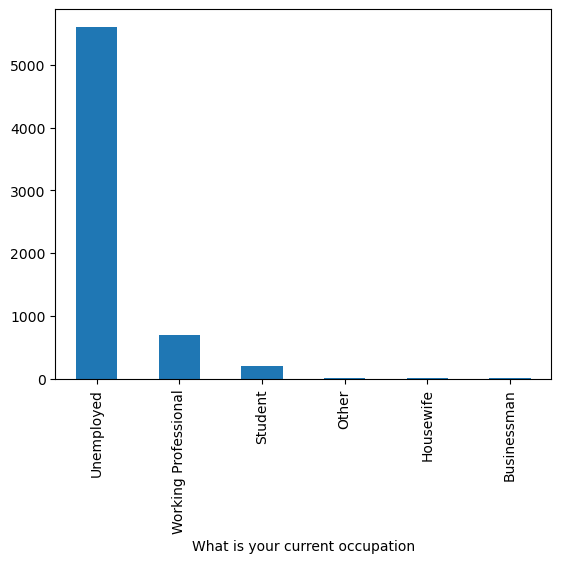

In [204]:
lead_data['What is your current occupation'].value_counts().plot.bar()
plt.show()

In [205]:
### from above we can see the Unemployed is the highest therefore we can impute the missing values to Unemployed
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.NaN,"Unemployed")

In [206]:
##### Next we will look into column 'What matters most to you in choosing a course' which has 29% missing value
lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [207]:
### as we can see that almost all value is 'Better Career Prospects', so we can replace null values to the same
lead_data['What matters most to you in choosing a course']= lead_data['What matters most to you in choosing a course'].replace(np.NaN,"Better Career Prospects")

In [208]:
###### Next missing column is Tags which has 36% missing values
print(lead_data['Tags'].value_counts())
print("--------------------MIssing Values count-------------",lead_data['Tags'].isnull().sum())

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [209]:
######## There is a high amount of missing value to replace with any other category so we can replace with new category
lead_data['Tags'] = lead_data['Tags'].replace(np.NaN,"Others")

In [210]:
###### Next column is 'Lead Quality' which has 51% missing value
print(lead_data['Lead Quality'].value_counts())
print("--------------------MIssing Values count-------------",lead_data['Lead Quality'].isnull().sum())

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64
--------------------MIssing Values count------------- 4767


In [211]:
#### Here there is a high amount of missing value to replace with any other category so we can replace with new category
lead_data['Lead Quality'] = lead_data['Lead Quality'].replace(np.NaN,"Others")

In [212]:
####### Next columns is 'Lead Profile' which has 74% missing value.
print(lead_data['Lead Profile'].value_counts())
print("--------------------MIssing Values count-------------",lead_data['Lead Profile'].isnull().sum())

Lead Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64
--------------------MIssing Values count------------- 6855


In [213]:
#### The missing value percent very high so we have to drop this column
lead_data.drop("Lead Profile",axis=1,inplace=True)

In [214]:
######### Next Column is 'City' which has 39% missing values
print(lead_data['City'].value_counts())
print("--------------------MIssing Values count-------------",lead_data['City'].isnull().sum())

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64
--------------------MIssing Values count------------- 3669


In [215]:
##### According to the spread of above data we can see the Mumbai has the highest count, so we can replace it with Mumbai
lead_data['City'] = lead_data['City'].replace(np.NaN,"Mumbai")

In [216]:
lead_data[['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score']].head()

,Asymmetrique Activity Index,Asymmetrique Activity Score,Asymmetrique Profile Index,Asymmetrique Profile Score
0,02.Medium,15.0,02.Medium,15.0
1,02.Medium,15.0,02.Medium,15.0
2,02.Medium,14.0,01.High,20.0
3,02.Medium,13.0,01.High,17.0
4,02.Medium,15.0,01.High,18.0


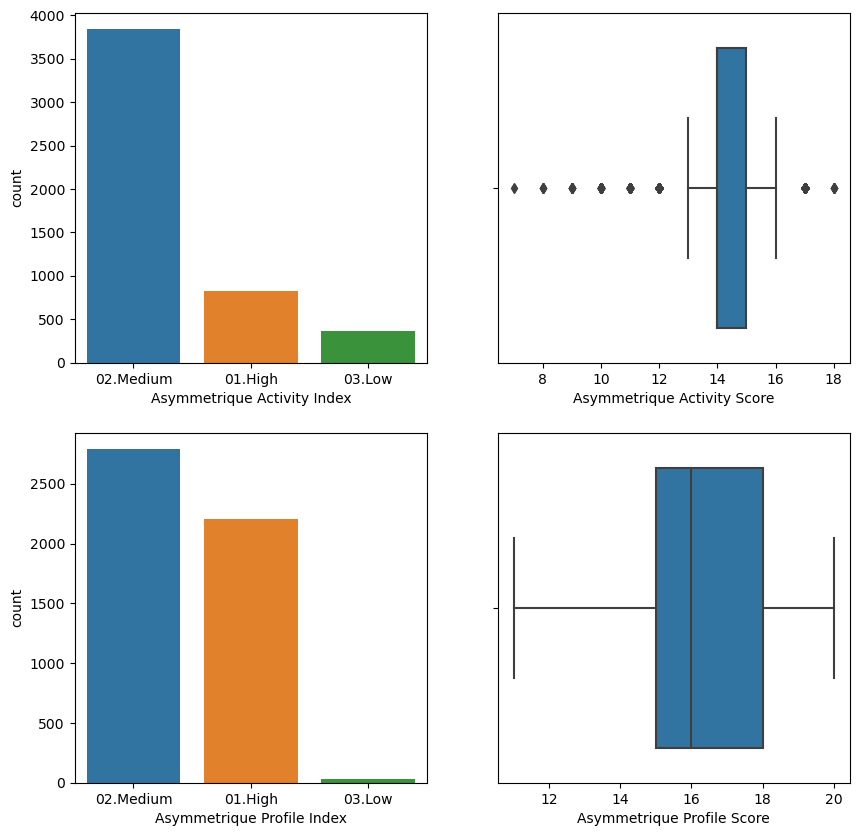

In [217]:
#### NExt we have these columns with around 45 % missing values
#### 'Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'

fig,ax =plt.subplots(2,2,figsize=(10, 10))
f1 = sns.countplot(data=lead_data, x='Asymmetrique Activity Index' ,ax = ax[0][0])
f1.set_label("Asymmetrique Activity Index")

f2 = sns.boxplot(data=lead_data,x='Asymmetrique Activity Score', ax= ax[0][1])
f2.set_label("Asymmetrique Activity Score")

f3 = sns.countplot(data = lead_data, x='Asymmetrique Profile Index',ax=ax[1][0])
f3.set_label("Asymmetrique Profile Index")

f4 = sns.boxplot(data = lead_data,x='Asymmetrique Profile Score',ax=ax[1][1])
f4.set_label("Asymmetrique Profile Score")

plt.show()

In [218]:
###### In these columns missing values are high plus there is variation in data, so we cannot replace 
######  the values so we have to drop the columns in this case
lead_data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                'Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1,inplace=True)

In [219]:
round(100*(lead_data.isnull().sum()/lead_data.shape[0]),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [220]:
####### Now we can columns with very less <2 % missing, so for these we can just drop the rows as it wont have any significant difference
lead_data.dropna(inplace=True)

In [221]:
round(100*(lead_data.isnull().sum()/lead_data.shape[0]),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

#### Our dataset looks clean now. Data Cleaning process is completed,
## Now we move to EDA part

In [222]:
### Lets check the Converted ratio
100*(lead_data['Converted'].value_counts()/lead_data.shape[0])

Converted
0    62.144589
1    37.855411
Name: count, dtype: float64

###### The ratio looks pretty decent with 37.8% converted rate

#### Now lets look at the columns one by one

###### Lead Origin

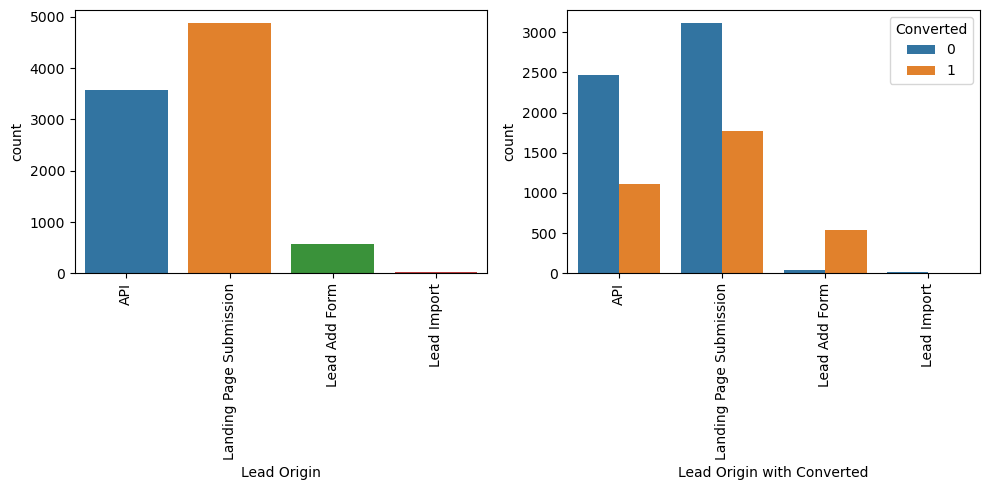

In [223]:
# Lead Origin
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

f1 = sns.countplot(data=lead_data, x='Lead Origin', ax=ax[0])
f1.set_xlabel("Lead Origin")
f1.set_xticklabels(f1.get_xticklabels(), rotation=90)

f2 = sns.countplot(data=lead_data, x='Lead Origin', hue='Converted', ax=ax[1])
f2.set_xlabel("Lead Origin with Converted")
f2.set_xticklabels(f2.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()



> We can see that for API and Landing Page Submission the conversion rate is around 40%-50%
> Lead Add Form has very less data but almost 90% of data is converted.
> Lead Import has very less amount of data

> So we need to increase the conversion rate of API and Landing Page Submission and generate from leads from Lead Add Form

##### Lead Source

In [224]:
lead_data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

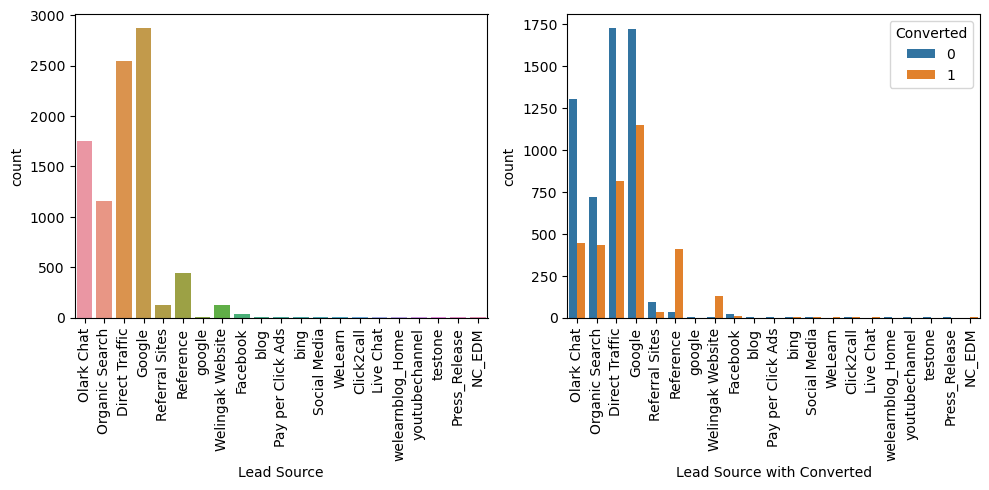

In [225]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

f1 = sns.countplot(data=lead_data, x='Lead Source', ax=ax[0])
f1.set_xlabel("Lead Source")
f1.set_xticklabels(f1.get_xticklabels(), rotation=90)

f2 = sns.countplot(data=lead_data, x='Lead Source', hue='Converted', ax=ax[1])
f2.set_xlabel("Lead Source with Converted")
f2.set_xticklabels(f2.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [226]:
#### Here we can see that, first there is more data points we need to combine few and also Google is written twice 'google' and 'Google', so we need to fix this
lead_data['Lead Source'] = lead_data['Lead Source'].replace("google","Google")
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 
        'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

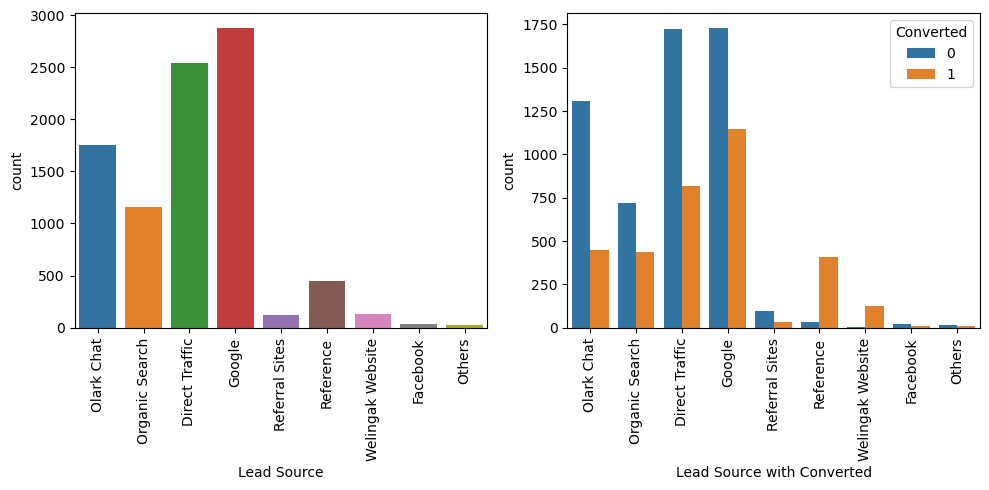

In [227]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

f1 = sns.countplot(data=lead_data, x='Lead Source', ax=ax[0])
f1.set_xlabel("Lead Source")
f1.set_xticklabels(f1.get_xticklabels(), rotation=90)

f2 = sns.countplot(data=lead_data, x='Lead Source', hue='Converted', ax=ax[1])
f2.set_xlabel("Lead Source with Converted")
f2.set_xticklabels(f2.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

> We can see the google has the highest Lead Source and around 70% of Google Lead Source are converted.

> Next Direct Traffic also has high Lead Source but its convertion rate is little less comparated to Google, approx. 40%-50%

> We can see the Reference conversion and Welingak Website is approx. 90%

> In order to increase the conversion more Reference, Welingak Website to increase their Lead Source and and try to increase conversion rates of google,direct traffic, olark chat, organic search

##### Do Not Email and Do Not Call

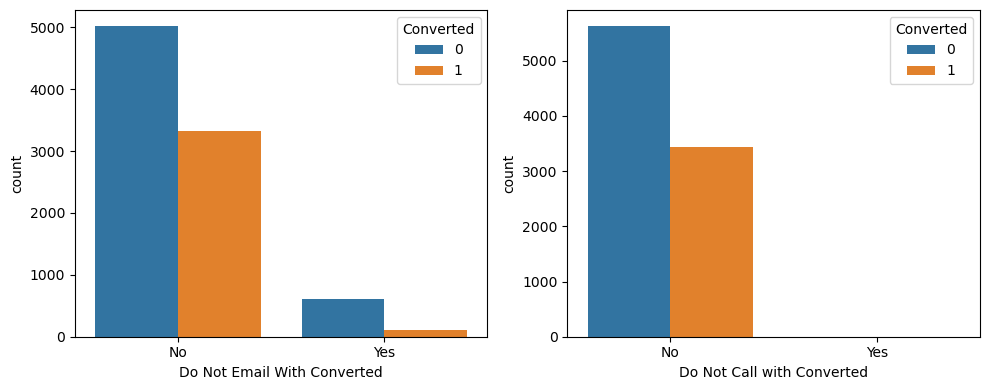

In [228]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))

f1 = sns.countplot(data=lead_data, x='Do Not Email', hue='Converted', ax=ax[0])
f1.set_xlabel("Do Not Email With Converted")

f2 = sns.countplot(data=lead_data, x='Do Not Call', hue='Converted', ax=ax[1])
f2.set_xlabel("Do Not Call with Converted")

plt.tight_layout()
plt.show()

> We can see that 'No' volume is high in both Do Not Email and Do Not Call and the conversion rate is approx 70%


##### TotalVisits

In [229]:
lead_data['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: xlabel='Converted', ylabel='TotalVisits'>

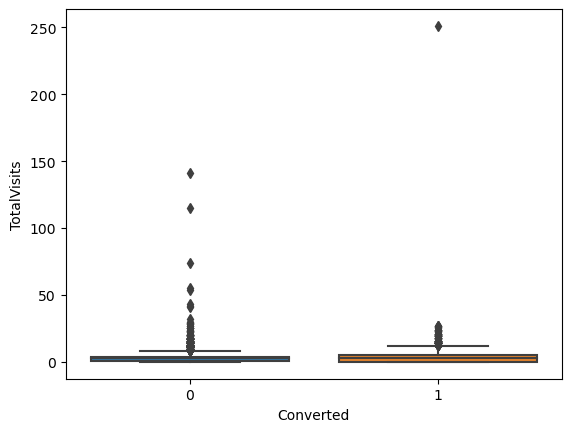

In [230]:
sns.boxplot(data=lead_data, y='TotalVisits',x="Converted")

In [231]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [232]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

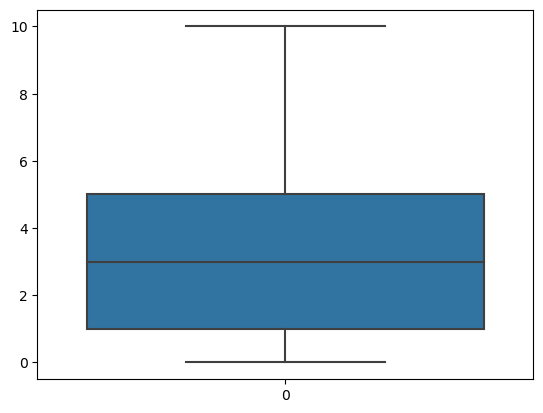

In [233]:
sns.boxplot(lead_data['TotalVisits'])

<Axes: xlabel='Converted', ylabel='TotalVisits'>

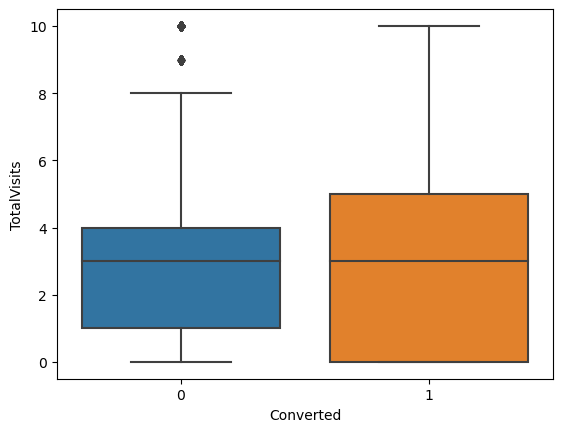

In [234]:
sns.boxplot(data = lead_data,y='TotalVisits',x='Converted')

##### We can see that Median of 0 and 1 is almost same

###### Total Time Spent on Website

In [235]:
lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

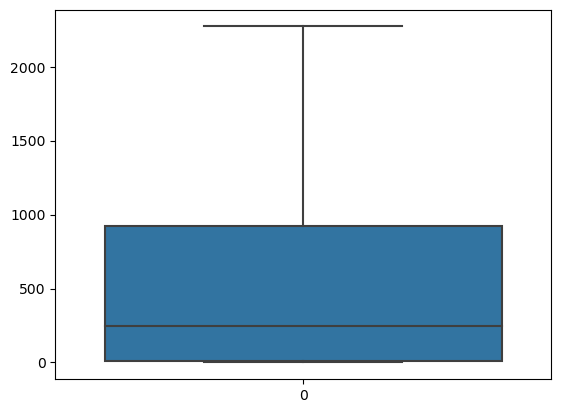

In [236]:
sns.boxplot(lead_data['Total Time Spent on Website'])

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

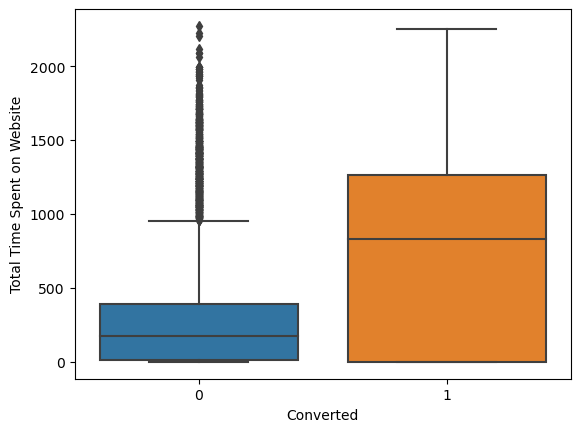

In [237]:
sns.boxplot(data=lead_data,y='Total Time Spent on Website',x='Converted')

###### In the above graph we can see that there is more conversion rate if you spend more time in the website. Therefore the company should built a more appealing website

#####  Page Views Per Visit

In [238]:
lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

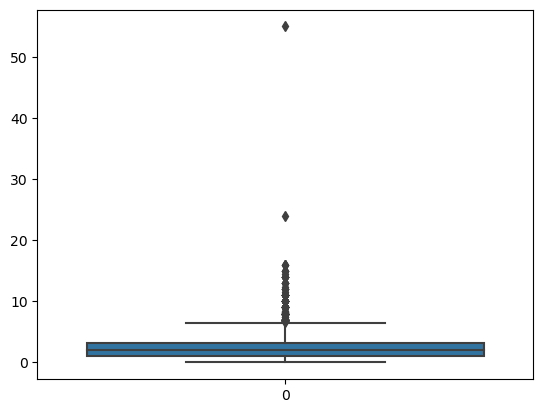

In [239]:
sns.boxplot(lead_data['Page Views Per Visit'])

In [240]:
lead_data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [241]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: >

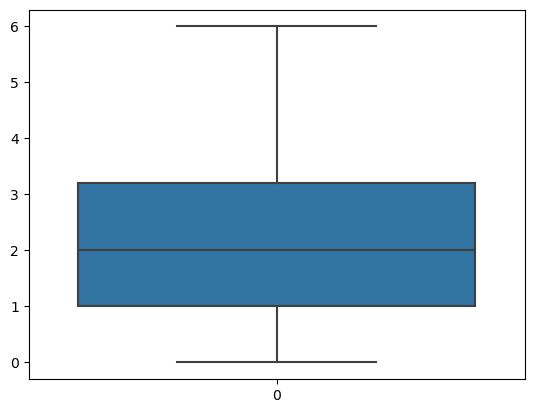

In [242]:
sns.boxplot(lead_data['Page Views Per Visit'])

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

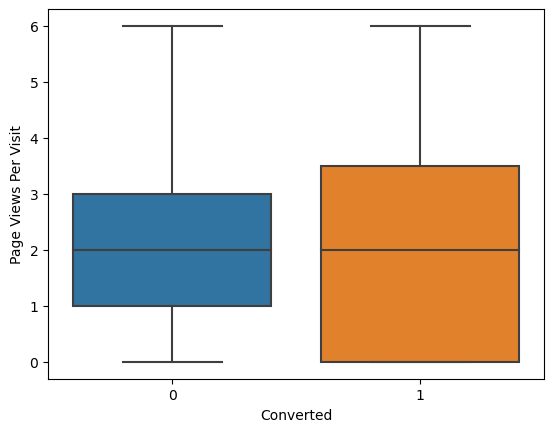

In [243]:
sns.boxplot(data=lead_data, y='Page Views Per Visit',x='Converted')

###### In the above graph we can see that both the boxplot has similar median, so we cannot infer much from the graph

###### Last Activity

In [244]:
lead_data['Last Activity'].value_counts()

Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

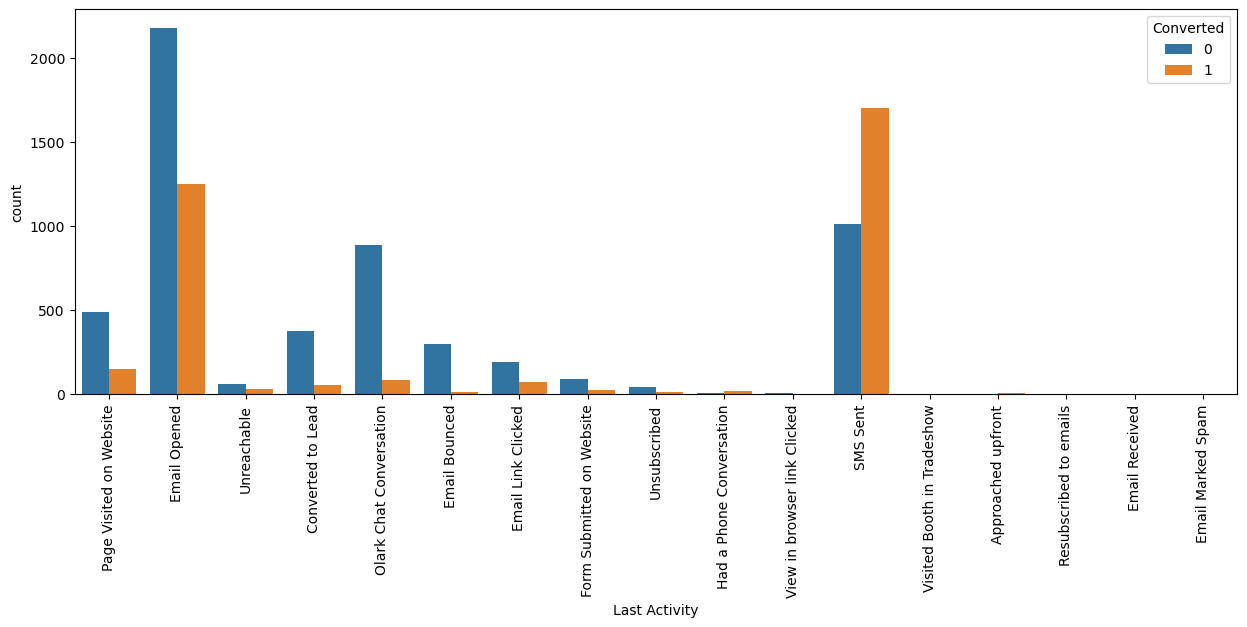

In [245]:
plt.figure(figsize=(15,5))
sns.countplot(data=lead_data,x='Last Activity',hue="Converted")
plt.xticks(rotation=90)
plt.show()

In [246]:
###### We can see in the above graph that there are many categories so its better to combine those categories for better analysis
lead_data['Last Activity'] =lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

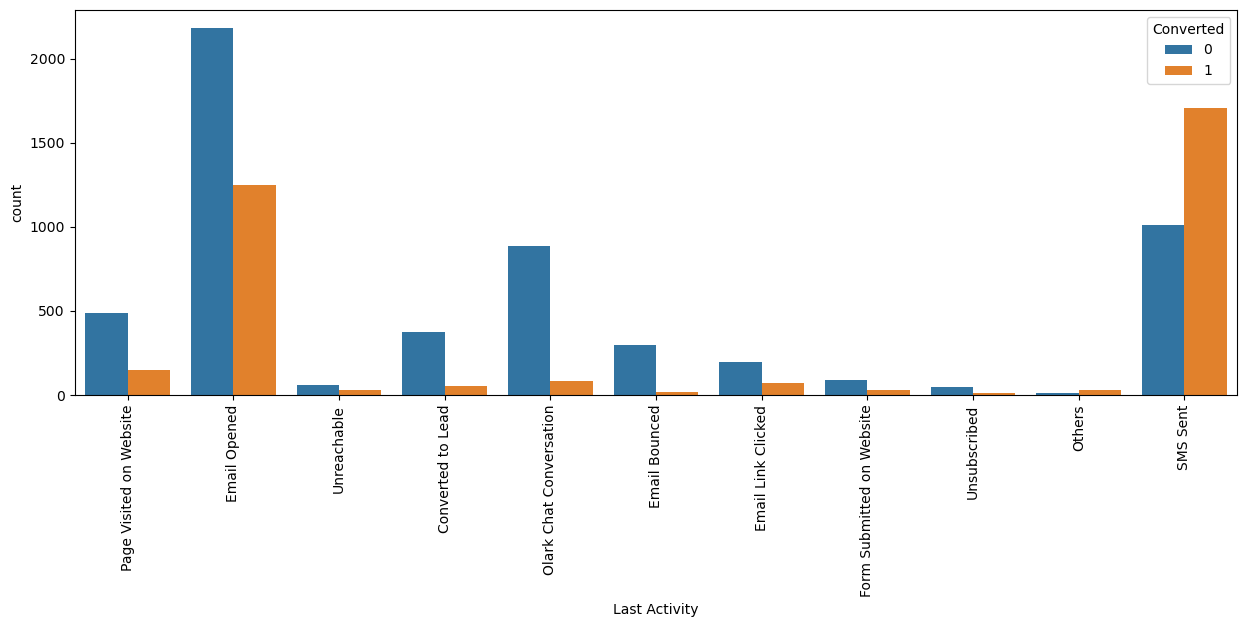

In [247]:
plt.figure(figsize=(15,5))
sns.countplot(data=lead_data,x='Last Activity',hue="Converted")
plt.xticks(rotation=90)
plt.show()

###### From the above graph we can infer that there is alot of email opened and sms sent has the highest conversion rate

In [248]:
100*(lead_data['Country'].value_counts()/lead_data.shape[0])

Country
India                   96.837117
United States            0.760414
United Arab Emirates     0.584086
Singapore                0.264492
Saudi Arabia             0.231430
United Kingdom           0.165307
Australia                0.143266
Qatar                    0.110205
Hong Kong                0.077143
Bahrain                  0.077143
Oman                     0.066123
France                   0.066123
unknown                  0.055102
South Africa             0.044082
Nigeria                  0.044082
Germany                  0.044082
Kuwait                   0.044082
Canada                   0.044082
Sweden                   0.033061
China                    0.022041
Asia/Pacific Region      0.022041
Uganda                   0.022041
Bangladesh               0.022041
Italy                    0.022041
Belgium                  0.022041
Netherlands              0.022041
Ghana                    0.022041
Philippines              0.022041
Russia                   0.011020
Switze

##### From above data we can see that about 96% data is from India

###### Specialization

In [249]:
lead_data['Specialization'].value_counts()

Specialization
Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

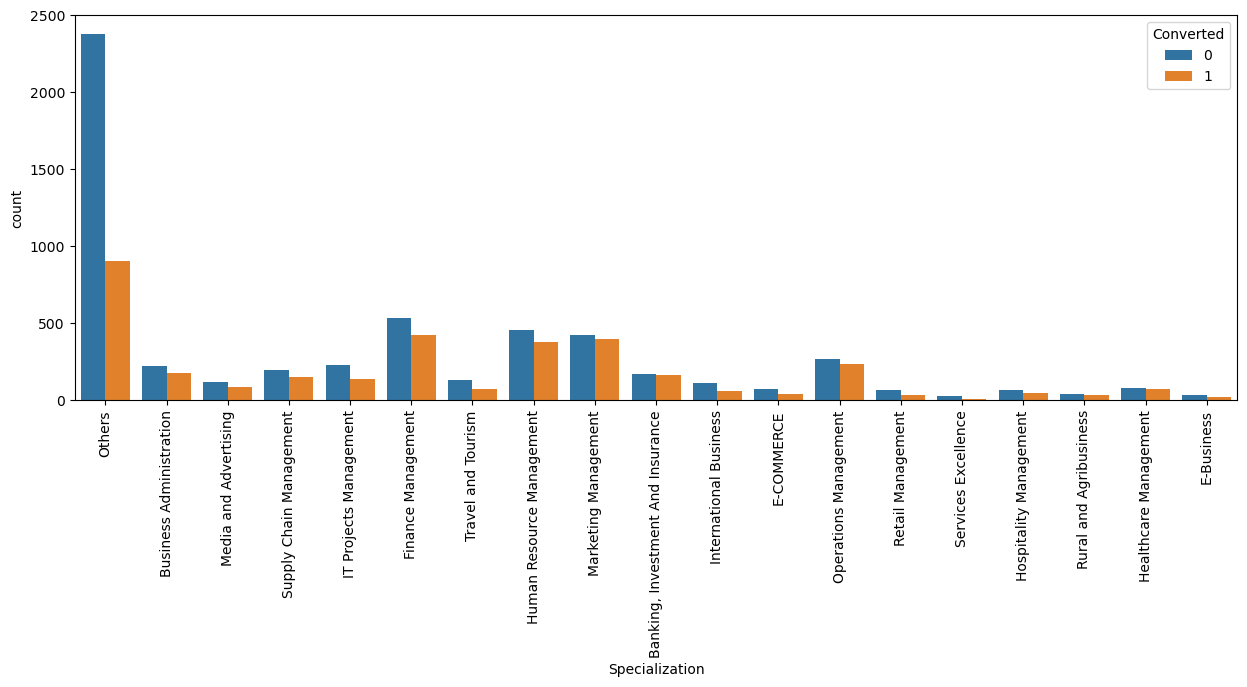

In [250]:
plt.figure(figsize=(15,5))
sns.countplot(data=lead_data,x='Specialization',hue='Converted')
plt.xticks(rotation=90)
plt.show()

##### From the above graph 'Finance Management','Human Resource Management','Marketing Management','Banking, Investment And Insurance','Operations Management' are the category which has equal conversion rate so we can focus more on these category

###### What is your current occupation

In [251]:
lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

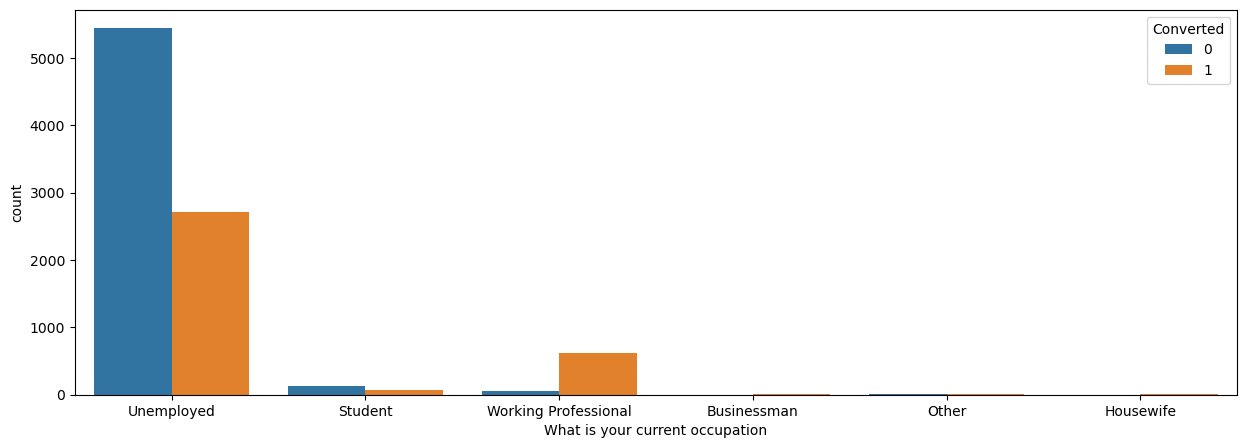

In [252]:
plt.figure(figsize=(15,5))
sns.countplot(data=lead_data,x='What is your current occupation',hue='Converted')
plt.show()

##### From the above graph we can see that there is very high volume of Unemployed category with around 50% conversion rate and Working Professional have a very high conversion rate

###### What matters most to you in choosing a course

In [253]:
lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

###### From above we can see that almost all data is in category 'Better Career Prospects'

###### Search

In [254]:
100*(lead_data['Search'].value_counts()/lead_data.shape[0])

Search
No     99.845713
Yes     0.154287
Name: count, dtype: float64

###### From the above we can see that all data points is 'No'

###### Magazine

In [255]:
lead_data['Magazine'].value_counts()

Magazine
No    9074
Name: count, dtype: int64

###### In this column all values are 'No'

###### Newspaper Article

In [256]:
lead_data['Newspaper Article'].value_counts()

Newspaper Article
No     9072
Yes       2
Name: count, dtype: int64

###### In this column almost all values are 'No'

###### X Education Forums

In [257]:
lead_data['X Education Forums'].value_counts()

X Education Forums
No     9073
Yes       1
Name: count, dtype: int64

###### In this column almost all values are 'No'

###### Newspaper

In [258]:
lead_data['Newspaper'].value_counts()

Newspaper
No     9073
Yes       1
Name: count, dtype: int64

###### In this column almost all values are 'No'

###### Digital Advertisement

In [259]:
lead_data['Digital Advertisement'].value_counts()

Digital Advertisement
No     9070
Yes       4
Name: count, dtype: int64

###### In this column almost all values are 'No'

##### Through Recommendations

In [260]:
lead_data['Through Recommendations'].value_counts()

Through Recommendations
No     9067
Yes       7
Name: count, dtype: int64

###### In this column almost all values are 'No'

###### Receive More Updates About Our Courses

In [261]:
lead_data['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9074
Name: count, dtype: int64

###### In this column all values are 'No'

###### Tags

In [262]:
lead_data['Tags'].value_counts()

Tags
Others                                               3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch 

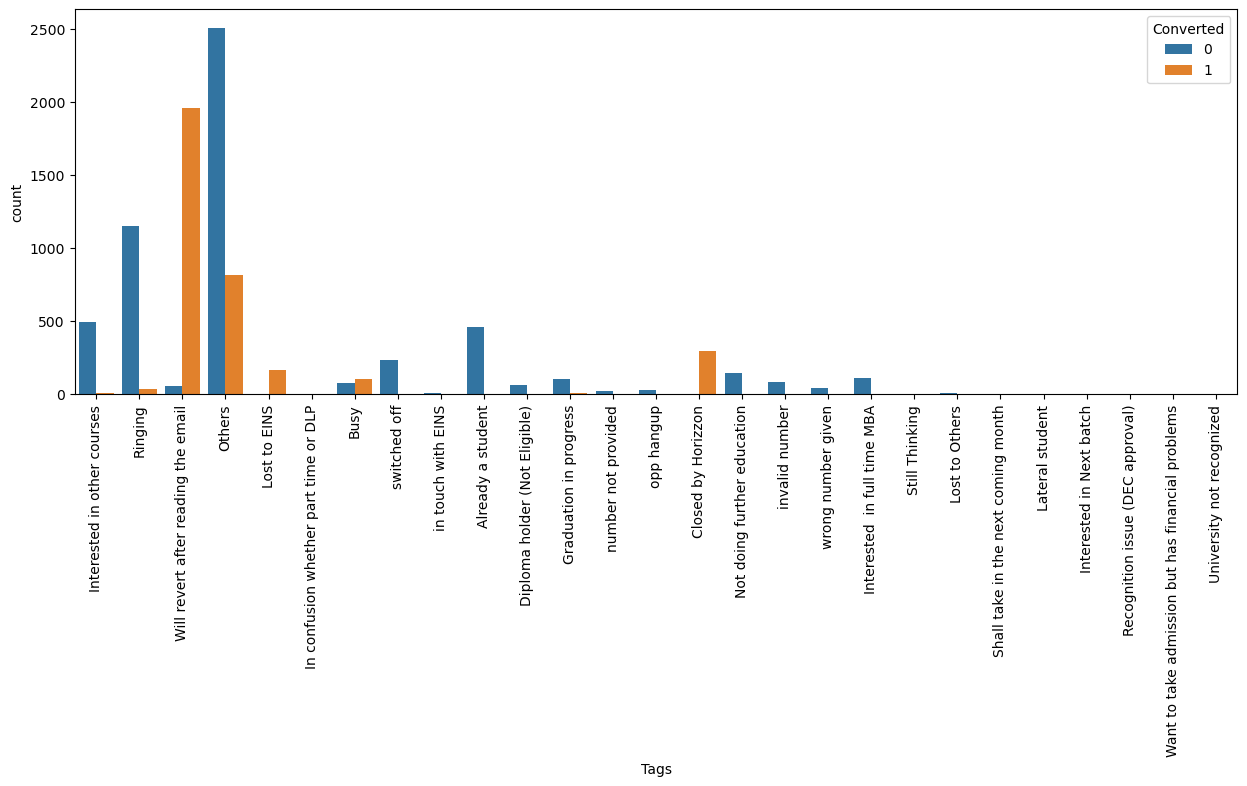

In [263]:
plt.figure(figsize=(15,5))
sns.countplot(data=lead_data,x='Tags',hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [264]:
##### Here we can see alot of category with very less data so we can combine these
lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

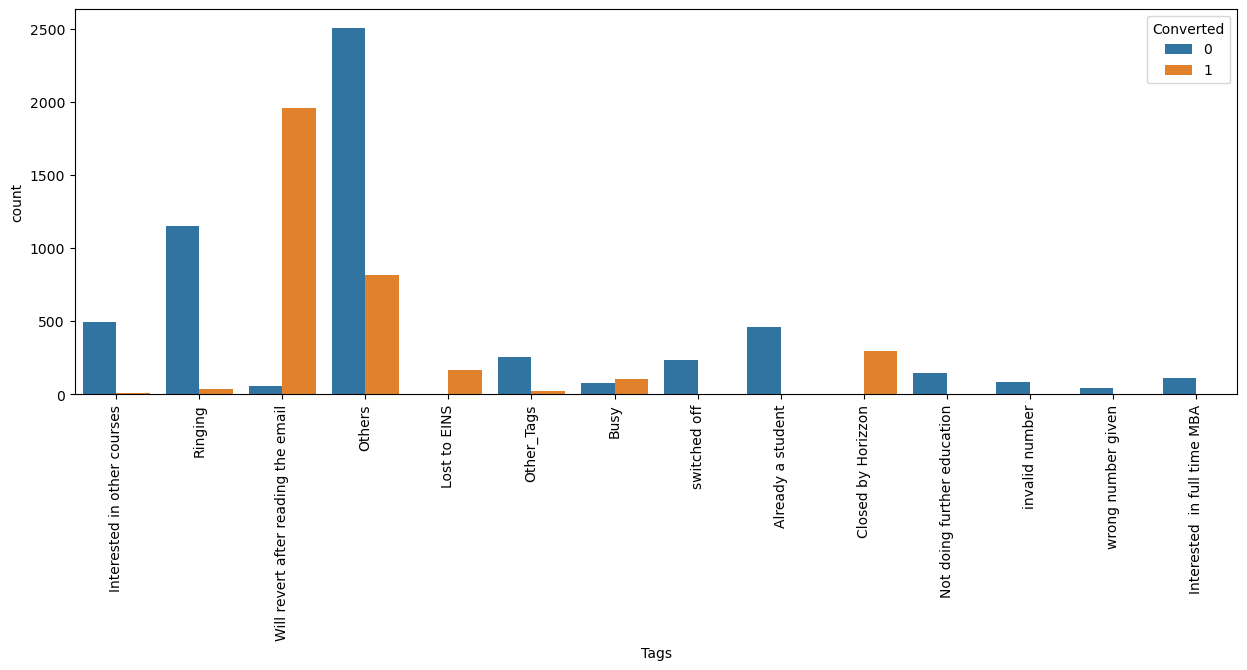

In [265]:
plt.figure(figsize=(15,5))
sns.countplot(data=lead_data,x='Tags',hue='Converted')
plt.xticks(rotation=90)
plt.show()

##### From the above graph we can infer that 'Interested in other courses','Ringing','Switched off','Already a student' has a very less conversion rate
##### Will revert after reading the email has a very good amount of data plus the conversion rate is also high

#### Lead Quality

In [266]:
lead_data['Lead Quality'].value_counts()

Lead Quality
Others               4720
Might be             1519
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: count, dtype: int64

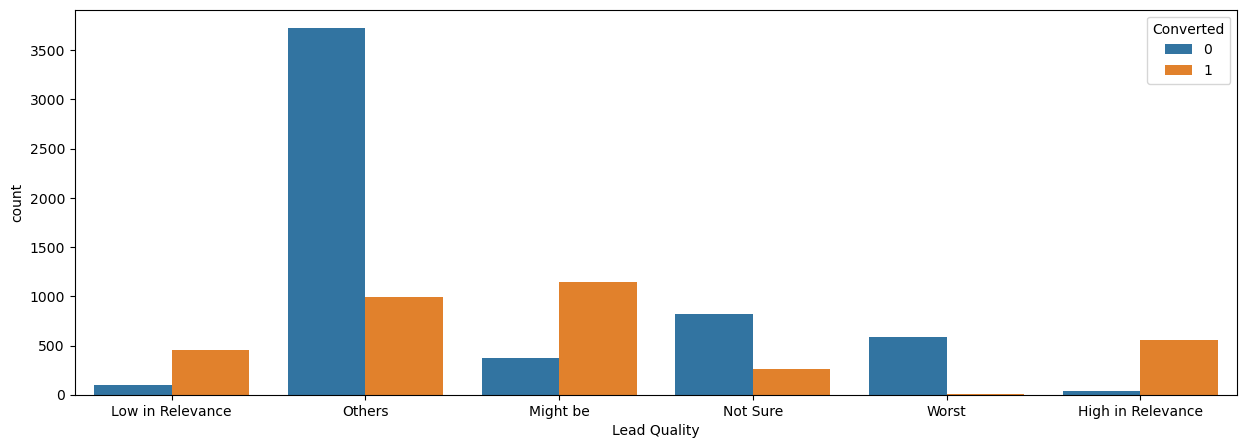

In [267]:
plt.figure(figsize=(15,5))
sns.countplot(data=lead_data,x='Lead Quality',hue='Converted')
plt.show()

##### From the above we can infer that both 'Low in Relevance' and 'High in Relevance' has a high converison rate. 'Might be' category also has a good conversion rate.

##### Update me on Supply Chain Content

In [268]:
lead_data['Update me on Supply Chain Content'].value_counts()

Update me on Supply Chain Content
No    9074
Name: count, dtype: int64

###### In this column all values are 'No'

###### Get updates on DM Content

In [269]:
lead_data['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    9074
Name: count, dtype: int64

###### In this column all values are 'No'

###### City

In [270]:
lead_data['City'].value_counts()

City
Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64

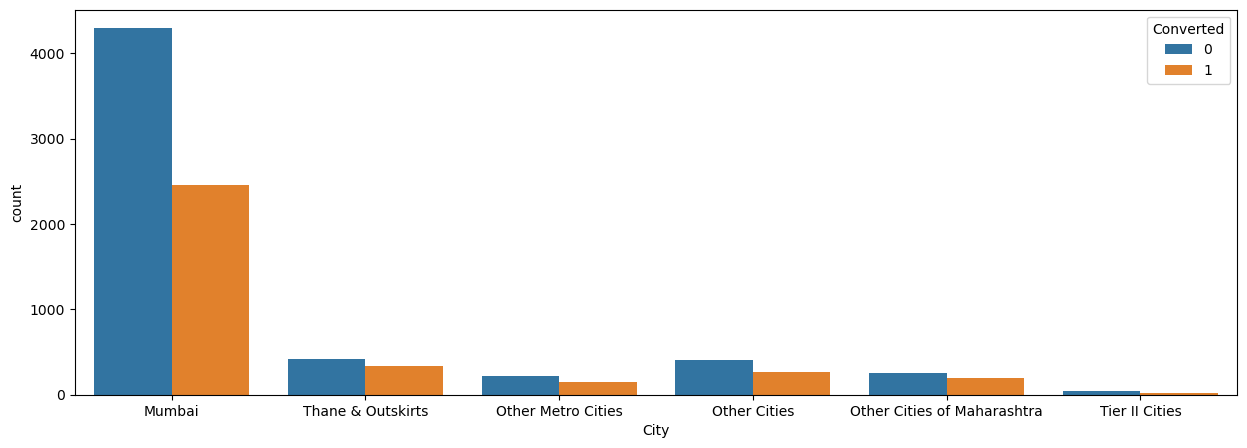

In [271]:
plt.figure(figsize=(15,5))
sns.countplot(data=lead_data,x='City',hue='Converted')
plt.show()

###### From the above graph we can infer that Mumbai has the highest count and its conversion rate is approx. 50%

##### I agree to pay the amount through cheque

In [272]:
lead_data['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9074
Name: count, dtype: int64

###### This column has all values as 'No'

##### A free copy of Mastering The Interview

In [273]:
lead_data['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6186
Yes    2888
Name: count, dtype: int64

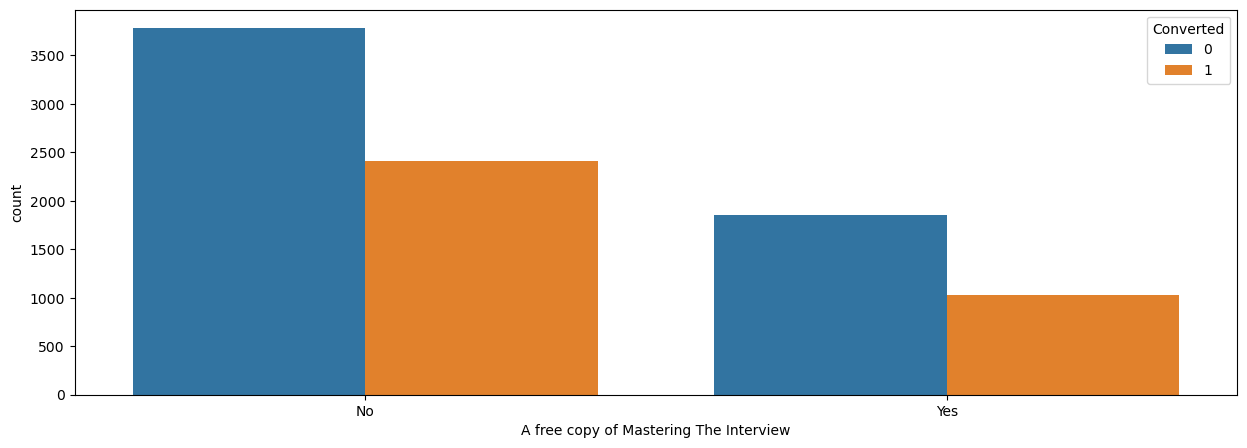

In [274]:
plt.figure(figsize=(15,5))
sns.countplot(data=lead_data,x='A free copy of Mastering The Interview',hue='Converted')
plt.show()

###### In the above graph we have a high volume of values in 'No' with almost 50% as conversion rate

###### Last Notable Activity

In [275]:
lead_data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

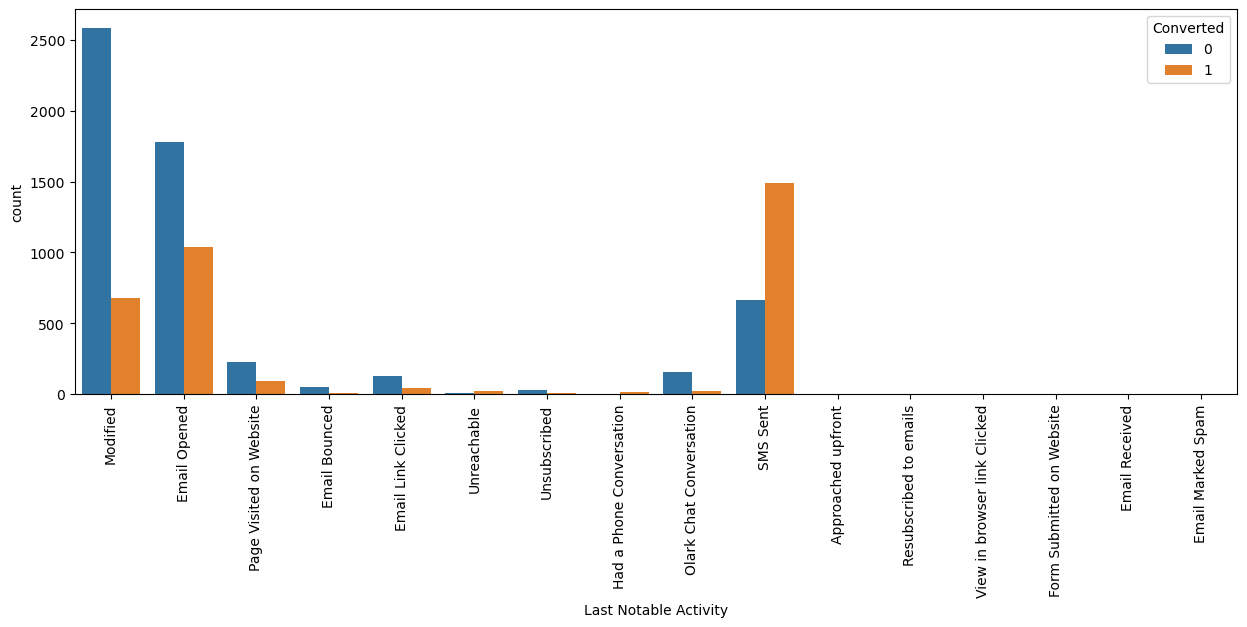

In [276]:
plt.figure(figsize=(15,5))
sns.countplot(data=lead_data,x='Last Notable Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

###### From the above graph we can infer that Modified has the highest volumee with very less conversion rate. Second Email Opened is also high with approx. 50% conversion rate. SMS Sent has the highest conversion rate

#### As we went on columns one by one we found there are some columns which are not necessary, so can simply drop them.

In [277]:
lead_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],axis=1,inplace=True)

In [278]:
lead_data.shape

(9074, 16)

In [279]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Others,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


## Data Preparation

In [280]:
### Converting/Mapping values first Yes/No columns
yesno_col =  ['Do Not Email', 'Do Not Call']
lead_data[yesno_col] = lead_data[yesno_col].apply(lambda x: x.map({'Yes': 1, "No": 0}))

In [281]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Others,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [282]:
##### Now we will create dummy variables for categorical variables
dummy_lead = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                  'What is your current occupation','Tags','Lead Quality','City',
                                  'Last Notable Activity']], drop_first=True , dtype=int)
dummy_lead.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Others,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [283]:
# Concatinating the lead_data and dummy values
lead_data = pd.concat([lead_data, dummy_lead], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Others,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Others,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [284]:
#### Now we need to drop the original columns
lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                  'Tags','Lead Quality','City','Last Notable Activity'], axis = 1,inplace=True)

In [285]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Others,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [286]:
from sklearn.model_selection import train_test_split
#### Extracting the feature
X = lead_data.drop(['Prospect ID','Converted'], axis=1)

In [287]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Others,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [288]:
####  Assigning target variable 
y = lead_data['Converted']

In [289]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [290]:
##### Now we split the data in train test (70/30)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [291]:
print("X_train_shape",X_train.shape)
print("X_test_shape",X_test.shape)
print("y_train_shape",y_train.shape)
print("y_test_shape",y_test.shape)

X_train_shape (6351, 87)
X_test_shape (2723, 87)
y_train_shape (6351,)
y_test_shape (2723,)


In [292]:
###### Now we will scale our variables 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Others,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1943,0,0,-0.432839,1.704380,-0.147676,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456,0,0,-0.432839,-0.789845,-0.147676,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6547,0,0,0.644762,-0.176811,1.544362,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8836,0,0,0.285562,2.117949,0.980349,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6529,0,0,0.644762,0.315446,1.544362,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Model Building 

In [293]:
##### Using LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()

In [294]:
##### Feature selection process
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)         
rfe = rfe.fit(X_train, y_train)

In [295]:
### Viewing the ranking of the columns according to the RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 66),
 ('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 58),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 60),
 ('Lead Source_Others', False, 57),
 ('Lead Source_Reference', False, 32),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 17),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 15),
 ('Last Activity_Form Submitted on Website', False, 19),
 ('Last Activity_Olark Chat Conversation', False, 30),
 ('Last Activity_Others', False, 13),
 ('Last Activity_Page Visited on Website', False, 37),
 ('Last Activity_SMS Sent', True, 1),

In [296]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Quality_Others', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [297]:
######## Now we will use statsmodel to further analyze the model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()


In [298]:
#### Lets check the summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1189.6
Date:                Sat, 24 Feb 2024   Deviance:                       2379.1
Time:                        11:50:48   Pearson chi2:                 9.83e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6122
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7517      0.233    -11.831      0.000      -3.208      -2.296
Do Not Email                                     -1.0532      0.252     -4.174      0.000      -1.548      -0.559
Total Time Spent on Website                       1.1061      0.063     17.628      0.000       0.983       1.229
Lead Origin_Lead Add Form                         1.7650      0.424      4.167      0.000       0.935       2.595
Lead Source_Olark Chat                            1.3299      0.151      8.826      0.000       1.035       1.625
Lead Source_Welingak Website                      4.5435      1.101      4.128      0.000       2.386       6.701
Last Activity_SMS Sent                            1.3652      0.229      5.969      0.000       0.917       1.814
Tags_Busy                                         1.8248      0.316      5.777      0.000       1.206       2.444
Tags_Closed by Horizzon                           8.0456      0.772     10.428      0.000       6.533       9.558
Tags_Lost to EINS                                 8.3592      0.802     10.428      0.000       6.788       9.930
Tags_Others                                       2.3266      0.294      7.915      0.000       1.751       2.903
Tags_Ringing                                     -2.1991      0.318     -6.909      0.000      -2.823      -1.575
Tags_Will revert after reading the email          5.6598      0.277     20.433      0.000       5.117       6.203
Tags_invalid number                             -21.9303   1.41e+04     -0.002      0.999   -2.78e+04    2.77e+04
Tags_switched off                                -2.7204      0.650     -4.184      0.000      -3.995      -1.446
Tags_wrong number given                         -22.2150   1.96e+04     -0.001      0.999   -3.85e+04    3.84e+04
Lead Quality_Others                              -1.3222      0.270     -4.897      0.000      -1.851      -0.793
Lead Quality_Worst                               -2.5594      0.734     -3.488      0.000      -3.997      -1.121
Last Notable Activity_Modified                   -1.3536      0.155     -8.757      0.000      -1.657      -1.051
Last Notable Activity_Olark Chat Conversation    -1.1372      0.371     -3.066      0.002      -1.864      -0.410
Last Notable Activity_SMS Sent                    0.8643      0.266      3.246      0.001       0.342       1.386
=================================================================================================================
"""


#### From the above statistics we can see that p-value of 'Tags_invalid number' is greater than 0.05, so we need to drop that column

In [299]:
new_col = col.drop('Tags_invalid number',1)
new_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Others',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [300]:
X_train_sm = sm.add_constant(X_train[new_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1193.4
Date:                Sat, 24 Feb 2024   Deviance:                       2386.7
Time:                        11:50:49   Pearson chi2:                 9.79e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6117
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8662      0.232    -12.348      0.000      -3.321      -2.411
Do Not Email                                     -1.0471      0.252     -4.158      0.000      -1.541      -0.554
Total Time Spent on Website                       1.1115      0.063     17.724      0.000       0.989       1.234
Lead Origin_Lead Add Form                         1.7920      0.426      4.206      0.000       0.957       2.627
Lead Source_Olark Chat                            1.3365      0.150      8.884      0.000       1.042       1.631
Lead Source_Welingak Website                      4.5211      1.102      4.104      0.000       2.362       6.680
Last Activity_SMS Sent                            1.3610      0.229      5.944      0.000       0.912       1.810
Tags_Busy                                         1.9498      0.314      6.203      0.000       1.334       2.566
Tags_Closed by Horizzon                           8.1617      0.772     10.574      0.000       6.649       9.674
Tags_Lost to EINS                                 8.4727      0.800     10.586      0.000       6.904      10.041
Tags_Others                                       2.4607      0.291      8.462      0.000       1.891       3.031
Tags_Ringing                                     -2.0639      0.316     -6.538      0.000      -2.683      -1.445
Tags_Will revert after reading the email          5.7740      0.277     20.871      0.000       5.232       6.316
Tags_switched off                                -2.5872      0.649     -3.986      0.000      -3.859      -1.315
Tags_wrong number given                         -21.0870   1.19e+04     -0.002      0.999   -2.33e+04    2.33e+04
Lead Quality_Others                              -1.3387      0.269     -4.982      0.000      -1.865      -0.812
Lead Quality_Worst                               -2.5348      0.736     -3.442      0.001      -3.978      -1.092
Last Notable Activity_Modified                   -1.3502      0.155     -8.725      0.000      -1.654      -1.047
Last Notable Activity_Olark Chat Conversation    -1.1411      0.371     -3.075      0.002      -1.869      -0.414
Last Notable Activity_SMS Sent                    0.8405      0.266      3.160      0.002       0.319       1.362
=================================================================================================================
"""

##### From the above statistics we can see that p-value of 'Tags_wrong number given' is greater than 0.05, so we need to drop that column

In [301]:
new_col = new_col.drop('Tags_wrong number given',1)
new_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Others', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [302]:
X_train_sm = sm.add_constant(X_train[new_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1196.2
Date:                Sat, 24 Feb 2024   Deviance:                       2392.5
Time:                        11:50:49   Pearson chi2:                 9.70e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6114
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9742      0.230    -12.917      0.000      -3.425      -2.523
Do Not Email                                     -1.0489      0.251     -4.176      0.000      -1.541      -0.557
Total Time Spent on Website                       1.1133      0.063     17.763      0.000       0.990       1.236
Lead Origin_Lead Add Form                         1.8102      0.428      4.234      0.000       0.972       2.648
Lead Source_Olark Chat                            1.3424      0.150      8.924      0.000       1.048       1.637
Lead Source_Welingak Website                      4.5063      1.102      4.089      0.000       2.346       6.666
Last Activity_SMS Sent                            1.3602      0.229      5.934      0.000       0.911       1.809
Tags_Busy                                         2.0580      0.312      6.590      0.000       1.446       2.670
Tags_Closed by Horizzon                           8.2421      0.772     10.682      0.000       6.730       9.754
Tags_Lost to EINS                                 8.5357      0.799     10.679      0.000       6.969      10.102
Tags_Others                                       2.5337      0.293      8.661      0.000       1.960       3.107
Tags_Ringing                                     -1.9547      0.313     -6.242      0.000      -2.568      -1.341
Tags_Will revert after reading the email          5.8753      0.276     21.311      0.000       5.335       6.416
Tags_switched off                                -2.4749      0.648     -3.821      0.000      -3.744      -1.206
Lead Quality_Others                              -1.3047      0.269     -4.844      0.000      -1.833      -0.777
Lead Quality_Worst                               -2.4668      0.739     -3.337      0.001      -3.915      -1.018
Last Notable Activity_Modified                   -1.3435      0.155     -8.681      0.000      -1.647      -1.040
Last Notable Activity_Olark Chat Conversation    -1.1410      0.371     -3.074      0.002      -1.868      -0.413
Last Notable Activity_SMS Sent                    0.8306      0.266      3.124      0.002       0.309       1.352
=================================================================================================================
"""

###### Now we can see that all columns/features p-value is less than 0.05

In [303]:
#### Along with p-value we need to check the VIF of the features too
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[new_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_col].values, i) for i in range(X_train[new_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Last Notable Activity_SMS Sent,6.41
5,Last Activity_SMS Sent,6.17
13,Lead Quality_Others,4.62
9,Tags_Others,4.25
15,Last Notable Activity_Modified,2.00
2,Lead Origin_Lead Add Form,1.78
11,Tags_Will revert after reading the email,1.72
3,Lead Source_Olark Chat,1.65
1,Total Time Spent on Website,1.46
10,Tags_Ringing,1.39


In [304]:
##### We can see that the feature 'Last Notable Activity_SMS Sent' has VIF higher than 5 so we need to remove them
new_col = new_col.drop('Last Notable Activity_SMS Sent',1)
new_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Others', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [305]:
X_train_sm = sm.add_constant(X_train[new_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1201.2
Date:                Sat, 24 Feb 2024   Deviance:                       2402.4
Time:                        11:50:50   Pearson chi2:                 9.69e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6108
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8904      0.227    -12.728      0.000      -3.335      -2.445
Do Not Email                                     -1.0185      0.251     -4.066      0.000      -1.509      -0.528
Total Time Spent on Website                       1.1090      0.062     17.779      0.000       0.987       1.231
Lead Origin_Lead Add Form                         1.7683      0.431      4.103      0.000       0.924       2.613
Lead Source_Olark Chat                            1.3746      0.149      9.218      0.000       1.082       1.667
Lead Source_Welingak Website                      4.5203      1.105      4.091      0.000       2.355       6.686
Last Activity_SMS Sent                            1.9708      0.119     16.519      0.000       1.737       2.205
Tags_Busy                                         2.0632      0.309      6.668      0.000       1.457       2.670
Tags_Closed by Horizzon                           8.3889      0.775     10.826      0.000       6.870       9.908
Tags_Lost to EINS                                 8.7169      0.803     10.861      0.000       7.144      10.290
Tags_Others                                       2.5314      0.293      8.636      0.000       1.957       3.106
Tags_Ringing                                     -1.8564      0.309     -6.004      0.000      -2.462      -1.250
Tags_Will revert after reading the email          5.9115      0.277     21.373      0.000       5.369       6.454
Tags_switched off                                -2.3883      0.645     -3.701      0.000      -3.653      -1.124
Lead Quality_Others                              -1.3295      0.270     -4.920      0.000      -1.859      -0.800
Lead Quality_Worst                               -2.4950      0.738     -3.379      0.001      -3.942      -1.048
Last Notable Activity_Modified                   -1.6400      0.128    -12.791      0.000      -1.891      -1.389
Last Notable Activity_Olark Chat Conversation    -1.2254      0.370     -3.309      0.001      -1.951      -0.499
=================================================================================================================
"""

In [306]:
#### Along with p-value we need to check the VIF of the features too
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[new_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_col].values, i) for i in range(X_train[new_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Lead Quality_Others,4.61
9,Tags_Others,4.25
2,Lead Origin_Lead Add Form,1.78
5,Last Activity_SMS Sent,1.65
11,Tags_Will revert after reading the email,1.65
3,Lead Source_Olark Chat,1.64
15,Last Notable Activity_Modified,1.64
1,Total Time Spent on Website,1.46
10,Tags_Ringing,1.37
4,Lead Source_Welingak Website,1.36


###### From the above table we can see that all the feature variables VIF is less than 5 so we are good to go

In [307]:
# So lets make prediction of the X_train
y_train_pred = res.predict(X_train_sm)
y_train_pred.head(10)

1943    0.014979
456     0.014710
6547    0.048708
8836    0.029001
6529    0.995235
7798    0.201748
2349    0.006189
5057    0.996447
3954    0.000489
4523    0.999121
dtype: float64

In [308]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.01497876, 0.01471037, 0.04870751, ..., 0.01814072, 0.1185412 ,
       0.11031805])

In [309]:
##### Now having a side by view of Actual Converted values and Predicted Converted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.014979,1943
1,0,0.014710,456
2,0,0.048708,6547
3,0,0.029001,8836
4,1,0.995235,6529


In [310]:
####### Now lets set a cut off value of 0.5 to set the Converted_prob to 0 or 1

In [311]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.014979,1943,0
1,0,0.014710,456,0
2,0,0.048708,6547,0
3,0,0.029001,8836,0
4,1,0.995235,6529,1


In [312]:
##### Now lets look at the confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3817  160]
 [ 289 2085]]


In [313]:
                # not converted  converted
# not converted     3788           174
# converted         275            2114

In [314]:
##### Finding the accuracy of the model.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9293024720516454


In [315]:
#### Setting the value to further calculate more metrics
true_p = confusion[1,1] # True Positive 
true_n = confusion[0,0] # True Negatives
false_p = confusion[0,1] # False Positives
false_n = confusion[1,0] # False Negatives

In [316]:
### Calculating Specificity
true_n / float(true_n+false_p)

0.959768669851647

In [317]:
# Calculating Sensitivity
true_p / float(true_p+false_n)

0.8782645324347094

In [318]:
# Calculate false postive rate - predicting converted when customer is not converted
print(false_p/ float(true_n+false_p))

0.04023133014835303


In [319]:
# Calculating the positive predictive value 
print (true_p / float(true_p+false_p))

0.9287305122494433


In [320]:
# Calculating Negative predictive value
print (true_n / float(true_n+ false_n))

0.9296151972722845


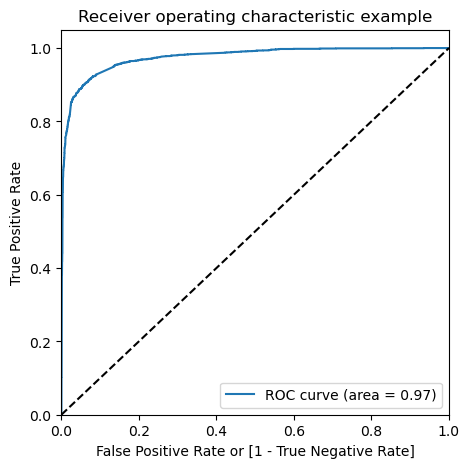

In [321]:
#### Now lets take a look at that ROC curve
#### Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### We know that in ROC Curve that greater the area under the curve the better

#### Now lets find the optimal threshold (cut-off)

In [322]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.014979,1943,0,1,0,0,0,0,0,0,0,0,0
1,0,0.014710,456,0,1,0,0,0,0,0,0,0,0,0
2,0,0.048708,6547,0,1,0,0,0,0,0,0,0,0,0
3,0,0.029001,8836,0,1,0,0,0,0,0,0,0,0,0
4,1,0.995235,6529,1,1,1,1,1,1,1,1,1,1,1


In [323]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373799  1.000000  0.000000
0.1   0.1  0.846323  0.970514  0.772190
0.2   0.2  0.895922  0.951559  0.862711
0.3   0.3  0.922532  0.914069  0.927584
0.4   0.4  0.926941  0.895956  0.945436
0.5   0.5  0.929302  0.878265  0.959769
0.6   0.6  0.929145  0.858045  0.971587
0.7   0.7  0.917336  0.811289  0.980639
0.8   0.8  0.908361  0.780118  0.984913
0.9   0.9  0.891828  0.724094  0.991954


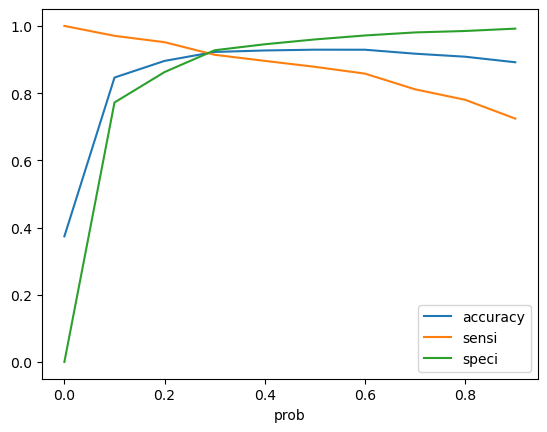

In [324]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the above curve,0.3 is the optimum point to take it as a cutoff probability

In [325]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.014979,1943,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.014710,456,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.048708,6547,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.029001,8836,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.995235,6529,1,1,1,1,1,1,1,1,1,1,1,1


In [326]:
##### Calculating and assigning the Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.014979,1943,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.014710,456,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0.048708,6547,0,1,0,0,0,0,0,0,0,0,0,0,5
3,0,0.029001,8836,0,1,0,0,0,0,0,0,0,0,0,0,3
4,1,0.995235,6529,1,1,1,1,1,1,1,1,1,1,1,1,100


In [327]:
#### Lets check the accuracy again now
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9225318847425602

In [328]:
#### Lets check the confusion now again
confusion_new = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_new

array([[3689,  288],
       [ 204, 2170]], dtype=int64)

In [329]:
#### Setting the value to further calculate more metrics
true_p = confusion_new[1,1] # True Positive 
true_n = confusion_new[0,0] # True Negatives
false_p = confusion_new[0,1] # False Positives
false_n = confusion_new[1,0] # False Negatives

In [330]:
### Calculating Specificity
true_n / float(true_n+false_p)

0.9275836057329645

In [331]:
# Calculating Sensitivity
true_p / float(true_p+false_n)

0.9140690817186183

In [332]:
# Calculate false positive rate - predicting converted when customer is not converted
print(false_p/ float(true_n+false_p))

0.07241639426703546


In [333]:
# Calculating the positive predictive value 
print (true_p / float(true_p+false_p))

0.8828315703824248


In [334]:
# Calculating Negative predictive value
print (true_n / float(true_n+ false_n))

0.9475982532751092


#### Calculating the Precision and Recall metric

In [335]:
###### Precision
confusion_new[1,1]/(confusion_new[0,1]+confusion_new[1,1])

0.8828315703824248

In [336]:
##### Recall
confusion_new[1,1]/(confusion_new[1,0]+confusion_new[1,1])

0.9140690817186183

In [337]:
#### We can calculate Precision and Recall metric using sklearn
from sklearn.metrics import precision_score, recall_score
print("Precision : ",precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted))
print("Recall : ",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision :  0.8828315703824248
Recall :  0.9140690817186183


#### Precision and Recall Trade-off

In [338]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: final_predicted, Length: 6351, dtype: int64)

In [339]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

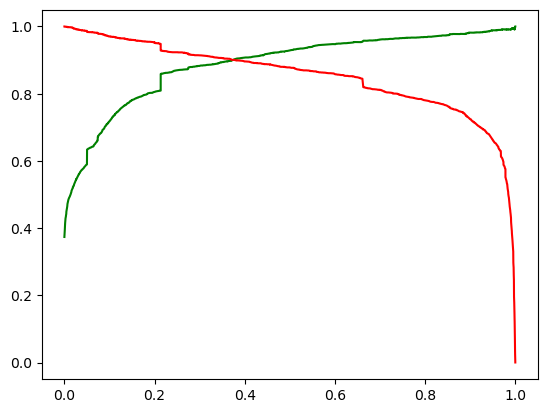

In [340]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making prediction on test dataset

In [341]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[
                                    ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [342]:
X_test=X_test[new_col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Others,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
465,0,-0.250009,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
5424,0,0.361195,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3503,0,-0.892323,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
4465,0,-0.892323,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
5394,0,-0.592210,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0


In [343]:
X_test_sm=sm.add_constant(X_test)

In [344]:
y_test_pred = res.predict(X_test_sm)

In [345]:
y_test_pred[:10]

465     0.026450
5424    0.001325
3503    0.001305
4465    0.004173
5394    0.068458
7831    0.087445
2314    0.982825
7042    0.409471
5428    0.213577
4349    0.948845
dtype: float64

In [346]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
465,0.026450
5424,0.001325
3503,0.001305
4465,0.004173
5394,0.068458


In [347]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [348]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [349]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [350]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [351]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,465,0.026450
1,0,5424,0.001325
2,0,3503,0.001305
3,0,4465,0.004173
4,0,5394,0.068458


In [352]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [353]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,465,0.026450
1,0,5424,0.001325
2,0,3503,0.001305
3,0,4465,0.004173
4,0,5394,0.068458


In [354]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [355]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,465,0.026450,0
1,0,5424,0.001325,0
2,0,3503,0.001305,0
3,0,4465,0.004173,0
4,0,5394,0.068458,0


In [356]:
y_pred_final

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,465,0.026450,0
1,0,5424,0.001325,0
2,0,3503,0.001305,0
3,0,4465,0.004173,0
4,0,5394,0.068458,0
...,...,...,...,...
2718,1,3436,0.227419,0
2719,0,1621,0.050047,0
2720,0,7665,0.001305,0
2721,0,7274,0.213577,0


## Model Evaluation

In [357]:
# Let's check the accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9254498714652957

In [358]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1541,  121],
       [  82,  979]], dtype=int64)

In [359]:
true_p = confusion_test[1,1] # true positive 
true_n = confusion_test[0,0] # true negatives
false_p = confusion_test[0,1] # false positives
false_n = confusion_test[1,0] # false negatives

In [360]:
# Let's see the sensitivity of our logistic regression model
true_p / float(true_p+false_n)

0.9227144203581527

In [361]:
# Let us calculate specificity
true_n / float(true_n+false_p)

0.9271961492178099

#### Overall we have created a good model with 92% accuracy with 0.3 cut-off

# The END